# Ejercicio Analitica de datos con Pyspark. Ilse Arredondo Reyes. 323019078

In [1]:
import findspark
findspark.init()

In [2]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.sql.functions import broadcast
from pyspark.sql.types import *
from pyspark.sql.functions import mean

In [3]:
import findspark
findspark.init()

import pandas as pd
import matplotlib.pyplot as plt
import pyspark
import numpy

In [4]:
spark = SparkSession.builder.getOrCreate()

In [5]:
df = spark.read.csv('C:/Users/ilse-/BIG DATA EJERCICIOS/stocks_price_final.csv', header=True, inferSchema=True)
df.show()

+---+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+
|_c0|symbol|      date|     open|     high|      low|    close| volume| adjusted|market.cap|       sector|            industry|exchange|
+---+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+
|  1|   TXG|2019-09-12|       54|       58|       51|    52.75|7326300|    52.75|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  2|   TXG|2019-09-13|    52.75|   54.355|49.150002|    52.27|1025200|    52.27|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  3|   TXG|2019-09-16|52.450001|       56|52.009998|55.200001| 269900|55.200001|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  4|   TXG|2019-09-17|56.209999|60.900002|   55.423|56.779999| 602800|56.779999|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  5|   TXG|2019-09-18|56.849998|    62.2

Eliminar o renombrar la variable market.cap  

In [6]:
df1= df.drop("market.cap")

df1.show()

+---+------+----------+---------+---------+---------+---------+-------+---------+-------------+--------------------+--------+
|_c0|symbol|      date|     open|     high|      low|    close| volume| adjusted|       sector|            industry|exchange|
+---+------+----------+---------+---------+---------+---------+-------+---------+-------------+--------------------+--------+
|  1|   TXG|2019-09-12|       54|       58|       51|    52.75|7326300|    52.75|Capital Goods|Biotechnology: La...|  NASDAQ|
|  2|   TXG|2019-09-13|    52.75|   54.355|49.150002|    52.27|1025200|    52.27|Capital Goods|Biotechnology: La...|  NASDAQ|
|  3|   TXG|2019-09-16|52.450001|       56|52.009998|55.200001| 269900|55.200001|Capital Goods|Biotechnology: La...|  NASDAQ|
|  4|   TXG|2019-09-17|56.209999|60.900002|   55.423|56.779999| 602800|56.779999|Capital Goods|Biotechnology: La...|  NASDAQ|
|  5|   TXG|2019-09-18|56.849998|    62.27|55.650002|       62|1589600|       62|Capital Goods|Biotechnology: La...|  

Filtrar los datos donde el valor de “open” es nulo y eliminar esas filas 

In [7]:
newdf = df1.filter(col("open").isNotNull())
newdf.show()

+---+------+----------+---------+---------+---------+---------+-------+---------+-------------+--------------------+--------+
|_c0|symbol|      date|     open|     high|      low|    close| volume| adjusted|       sector|            industry|exchange|
+---+------+----------+---------+---------+---------+---------+-------+---------+-------------+--------------------+--------+
|  1|   TXG|2019-09-12|       54|       58|       51|    52.75|7326300|    52.75|Capital Goods|Biotechnology: La...|  NASDAQ|
|  2|   TXG|2019-09-13|    52.75|   54.355|49.150002|    52.27|1025200|    52.27|Capital Goods|Biotechnology: La...|  NASDAQ|
|  3|   TXG|2019-09-16|52.450001|       56|52.009998|55.200001| 269900|55.200001|Capital Goods|Biotechnology: La...|  NASDAQ|
|  4|   TXG|2019-09-17|56.209999|60.900002|   55.423|56.779999| 602800|56.779999|Capital Goods|Biotechnology: La...|  NASDAQ|
|  5|   TXG|2019-09-18|56.849998|    62.27|55.650002|       62|1589600|       62|Capital Goods|Biotechnology: La...|  

In [8]:
newdf1 = newdf.na.drop(subset=["open"])
newdf1.show()

+---+------+----------+---------+---------+---------+---------+-------+---------+-------------+--------------------+--------+
|_c0|symbol|      date|     open|     high|      low|    close| volume| adjusted|       sector|            industry|exchange|
+---+------+----------+---------+---------+---------+---------+-------+---------+-------------+--------------------+--------+
|  1|   TXG|2019-09-12|       54|       58|       51|    52.75|7326300|    52.75|Capital Goods|Biotechnology: La...|  NASDAQ|
|  2|   TXG|2019-09-13|    52.75|   54.355|49.150002|    52.27|1025200|    52.27|Capital Goods|Biotechnology: La...|  NASDAQ|
|  3|   TXG|2019-09-16|52.450001|       56|52.009998|55.200001| 269900|55.200001|Capital Goods|Biotechnology: La...|  NASDAQ|
|  4|   TXG|2019-09-17|56.209999|60.900002|   55.423|56.779999| 602800|56.779999|Capital Goods|Biotechnology: La...|  NASDAQ|
|  5|   TXG|2019-09-18|56.849998|    62.27|55.650002|       62|1589600|       62|Capital Goods|Biotechnology: La...|  

Calcular el mínimo y máximo de data, open, close y adjusted 

In [9]:
newdf1.describe('date','open','close','adjusted').show()

+-------+------------------+------------------+------------------+
|summary|              open|             close|          adjusted|
+-------+------------------+------------------+------------------+
|  count|           1729034|           1729034|           1729034|
|   mean|15070.071703341047| 15032.71485433071|14926.109688795501|
| stddev|1111821.8002863121|1109755.9294000654|1101877.6328940047|
|    min|             0.072|             0.071|         -0.388907|
|    max|                NA|                NA|                NA|
+-------+------------------+------------------+------------------+



Convertir un DataFrame de Spark en un DataFrame de pandas 

In [10]:
dfpandas = newdf1.toPandas()
dfpandas.head()

,_c0,symbol,date,open,high,low,close,volume,adjusted,sector,industry,exchange
0,1,TXG,2019-09-12,54,58,51,52.75,7326300,52.75,Capital Goods,Biotechnology: Laboratory Analytical Instruments,NASDAQ
1,2,TXG,2019-09-13,52.75,54.355,49.150002,52.27,1025200,52.27,Capital Goods,Biotechnology: Laboratory Analytical Instruments,NASDAQ
2,3,TXG,2019-09-16,52.450001,56,52.009998,55.200001,269900,55.200001,Capital Goods,Biotechnology: Laboratory Analytical Instruments,NASDAQ
3,4,TXG,2019-09-17,56.209999,60.900002,55.423,56.779999,602800,56.779999,Capital Goods,Biotechnology: Laboratory Analytical Instruments,NASDAQ
4,5,TXG,2019-09-18,56.849998,62.27,55.650002,62,1589600,62,Capital Goods,Biotechnology: Laboratory Analytical Instruments,NASDAQ


Calcular la media de las variables open, close y adjusted por industria 

In [11]:
print(dfpandas.dtypes)

# Limpia los datos no numéricos en la columna 'open' (reemplaza 'df' y 'open' con tus datos reales)
dfpandas['open'] = pd.to_numeric(dfpandas['open'], errors='coerce')

# Limpia los datos no numéricos en la columna 'close'
dfpandas['close'] = pd.to_numeric(dfpandas['close'], errors='coerce')

# Limpia los datos no numéricos en la columna 'adjusted'
dfpandas['adjusted'] = pd.to_numeric(dfpandas['adjusted'], errors='coerce')

_c0          int32
symbol      object
date        object
open        object
high        object
low         object
close       object
volume      object
adjusted    object
sector      object
industry    object
exchange    object
dtype: object


In [12]:
media_por_industria = dfpandas.groupby('industry')[['open','close', 'adjusted']].mean()

print(media_por_industria)

                                         open       close    adjusted
industry                                                             
Accident &Health Insurance          32.051694   32.050321   31.237062
Advertising                         15.772742   15.760318   15.337851
Aerospace                           81.431188   81.380611   80.432628
Agricultural Chemicals              22.046414   22.042051   21.635093
Air Freight/Delivery Services       45.764322   45.698841   45.323198
...                                       ...         ...         ...
Tools/Hardware                      70.412755   70.475944   69.670351
Transportation Services            140.937806  140.917862  140.768352
Trucking Freight/Courier Services   42.781825   42.816390   42.263292
Water Supply                        40.580483   40.584874   40.173328
Wholesale Distributors              16.608839   16.602717   16.602717

[135 rows x 3 columns]


Generar un gráfico de líneas donde se muestre la media de open por industria

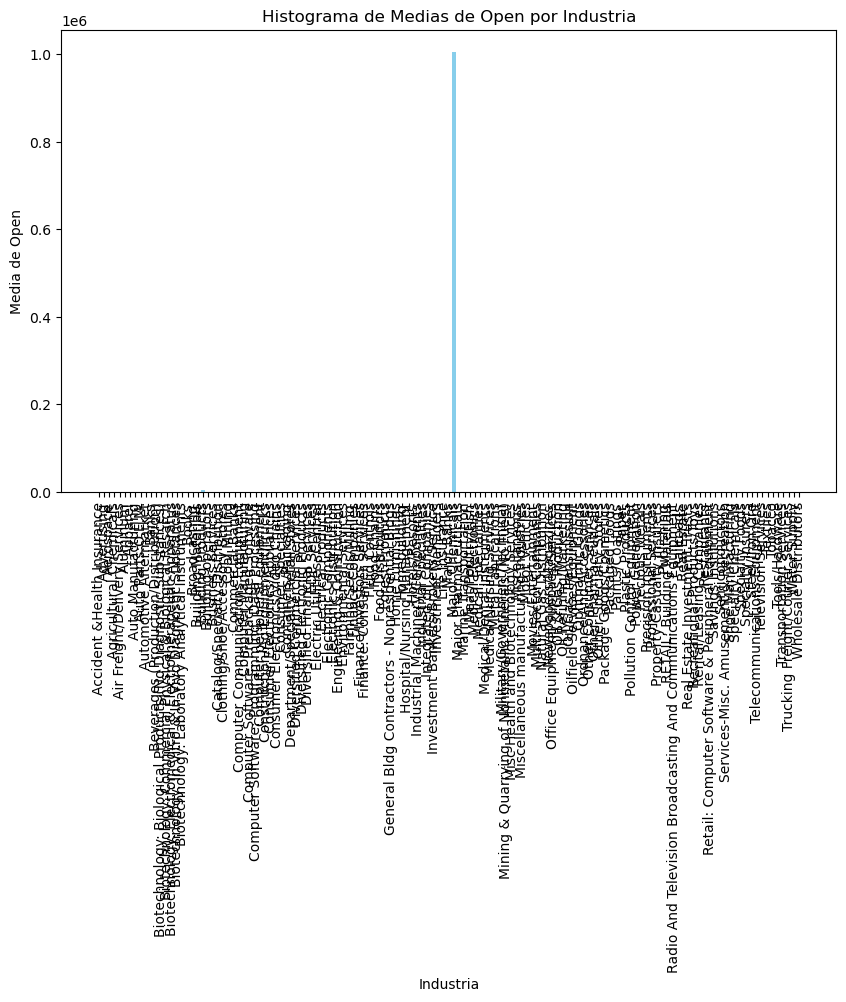

In [28]:
plt.figure(figsize=(10, 6))
industrias = media_por_industria.index
medias_open = media_por_industria['open']
plt.bar(industrias, medias_open, color='skyblue')
plt.xlabel('Industria')
plt.ylabel('Media de Open')
plt.title('Histograma de Medias de Open por Industria')  # Título del gráfico
plt.xticks(rotation=90)
plt.show()

Generar un heatmap con seaborn donde se muestre la correlación entre las medias de open, close y adjusted

In [15]:
import seaborn as sns

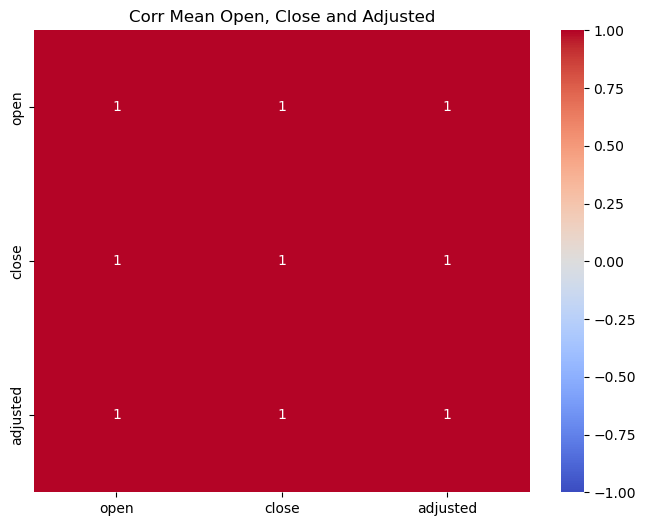

In [27]:
correlation_matrix = media_por_industria[['open', 'close', 'adjusted']].corr()
plt.figure(figsize=(8, 6))  # Ajusta el tamaño del gráfico si es necesario
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Corr Mean Open, Close and Adjusted')
plt.show()

Guardar en un archivo parquet una selección de datos 

In [32]:
import pyarrow as pa
import pyarrow.parquet as pq

In [35]:
seleccion = dfpandas[['symbol', 'date', 'open', 'high', 'low', 'close', 'adjusted', 'sector', 'industry', 'exchange']]
tabla = pa.Table.from_pandas(seleccion)
pq.write_table(tabla, 'seleccion_datos.parquet')

In [36]:
spark.stop()